In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, InceptionV3
import torchvision
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x, y), _ = tf.keras.datasets.mnist.load_data()

In [3]:
len(x)

60000

In [4]:
num_samples = 1000
x = x[:num_samples]
y = y[:num_samples]

x = tf.convert_to_tensor(x, dtype=tf.float32)
x = tf.reshape(x, [-1, 28, 28, 1])

x = tf.image.resize(x, [32, 32])
x = tf.image.grayscale_to_rgb(x)
x = x / 255.0

x = x.numpy()

In [5]:
# Ensure x and y have the correct number of samples
num_samples = 1000
x = x[:num_samples]
y = y[:num_samples]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#VGG-16

In [10]:
vgg16_model = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))

In [11]:
model = models.Sequential([
    vgg16_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [15]:
history = model.fit(
    x_train_new, y_train_new,
    epochs=5,
    batch_size=4,
    validation_data=(x_val, y_val)
)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.0951 - loss: 2.3061 - val_accuracy: 0.1312 - val_loss: 2.3009
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.1482 - loss: 2.2987 - val_accuracy: 0.1312 - val_loss: 2.2997
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.1006 - loss: 2.3039 - val_accuracy: 0.1312 - val_loss: 2.3004
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.1089 - loss: 2.2992 - val_accuracy: 0.1312 - val_loss: 2.2980
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.0832 - loss: 2.2929 - val_accuracy: 0.1312 - val_loss: 2.2992


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.0855 - loss: 2.3084
Test Accuracy: 10.0000%


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


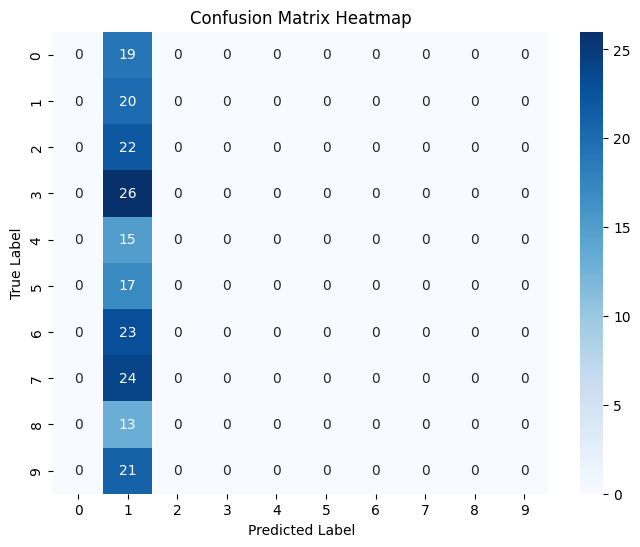

In [17]:
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


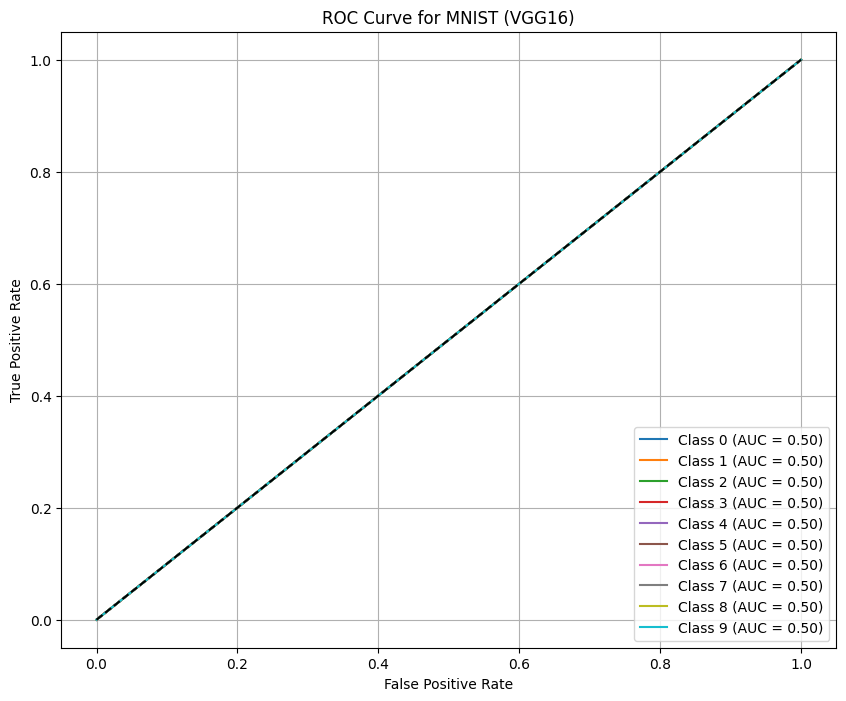

Micro-average AUC: 0.4917


In [18]:
y_test_bin = label_binarize(y_test, classes=np.arange(10))

y_probs = tf.nn.softmax(y_pred_logits).numpy()

fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST (VGG16)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print(f"Micro-average AUC: {roc_auc_micro:.4f}")


#VGG-16: "image-net" as weights

In [19]:
vgg16_model_imagenet = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [20]:
model = models.Sequential([
    vgg16_model_imagenet,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

In [25]:
history = model.fit(
    x_train_new, y_train_new,
    epochs=5,
    batch_size=4,
    validation_data=(x_val, y_val)
)

Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.1764 - loss: 2.2370 - val_accuracy: 0.2188 - val_loss: 2.0125
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.2550 - loss: 1.9680 - val_accuracy: 0.2125 - val_loss: 2.2415
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.2524 - loss: 2.4290 - val_accuracy: 0.1875 - val_loss: 2.0313
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.2601 - loss: 1.9924 - val_accuracy: 0.4500 - val_loss: 1.4936
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.3812 - loss: 1.6513 - val_accuracy: 0.4875 - val_loss: 1.3684


In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.4f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.4065 - loss: 1.3919
Test Accuracy: 40.5000%


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


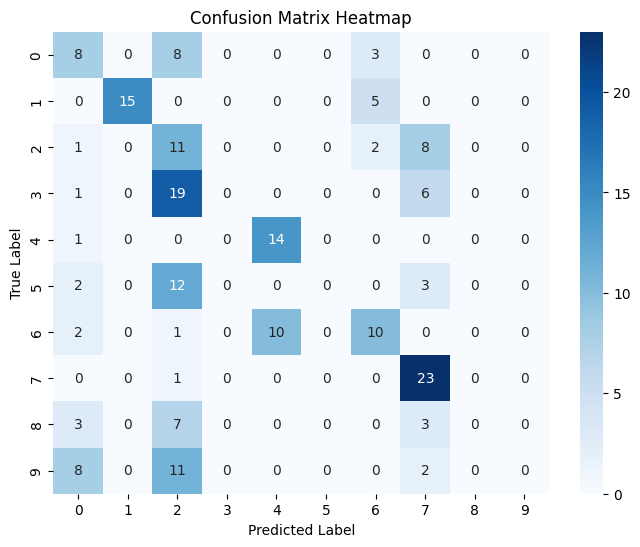

In [27]:
# Predict on test set
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

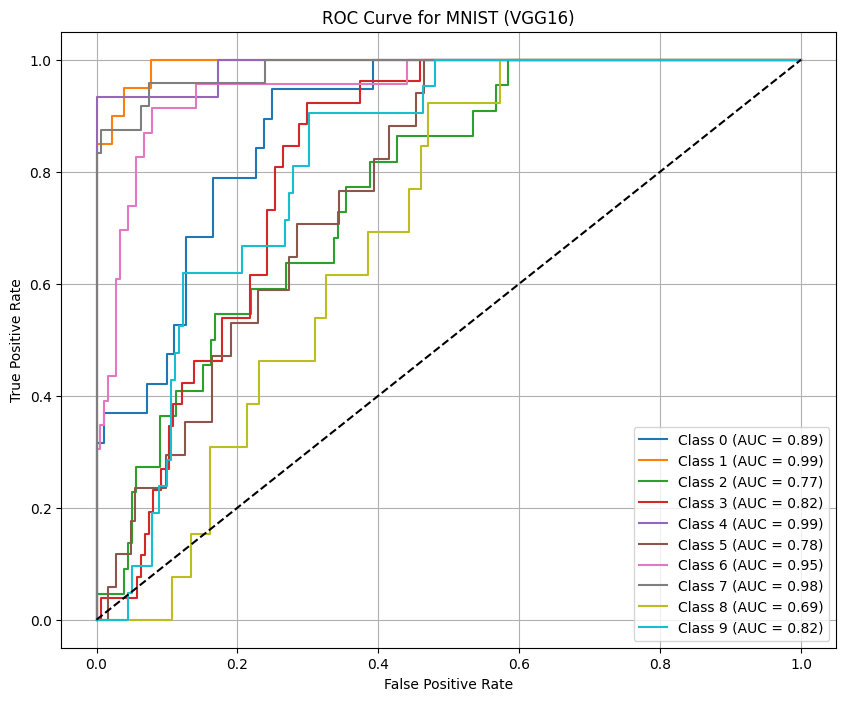

Micro-average AUC: 0.8824


In [28]:
y_test_bin = label_binarize(y_test, classes=np.arange(10))

y_probs = tf.nn.softmax(y_pred_logits).numpy()

fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST (VGG16)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print(f"Micro-average AUC: {roc_auc_micro:.4f}")


# AlexNet (weights=None)

In [29]:
import torchvision.transforms as transforms

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [31]:
from sklearn.model_selection import train_test_split
x_train_tensor = torch.from_numpy(x_train).permute(0, 3, 1, 2)
x_test_tensor = torch.from_numpy(x_test).permute(0, 3, 1, 2)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


train_dataset = MNISTDataset(x_train_new, y_train_new, transform=transform)
val_dataset = MNISTDataset(x_val, y_val, transform=transform)
test_dataset = MNISTDataset(x_test_tensor, y_test_tensor, transform=transform)

batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
alexnet_model = torchvision.models.alexnet(weights=None)
alexnet_model.classifier[6] = nn.Linear(alexnet_model.classifier[6].in_features, 10)

In [33]:
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)

alexnet_model.to(device)

for epoch in range(num_epochs):
    alexnet_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = alexnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Evaluation of epochs
    alexnet_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = alexnet_model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy after epoch {epoch+1}: {accuracy:.2f}%")

Epoch [1/5], Loss: 2.3295
Test Accuracy after epoch 1: 7.50%
Epoch [2/5], Loss: 2.3044
Test Accuracy after epoch 2: 7.50%
Epoch [3/5], Loss: 2.3016
Test Accuracy after epoch 3: 10.00%
Epoch [4/5], Loss: 2.2997
Test Accuracy after epoch 4: 10.00%
Epoch [5/5], Loss: 2.3011
Test Accuracy after epoch 5: 10.00%


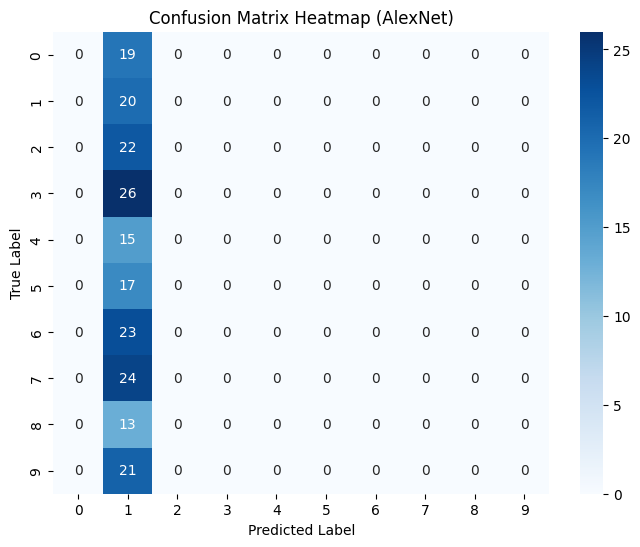

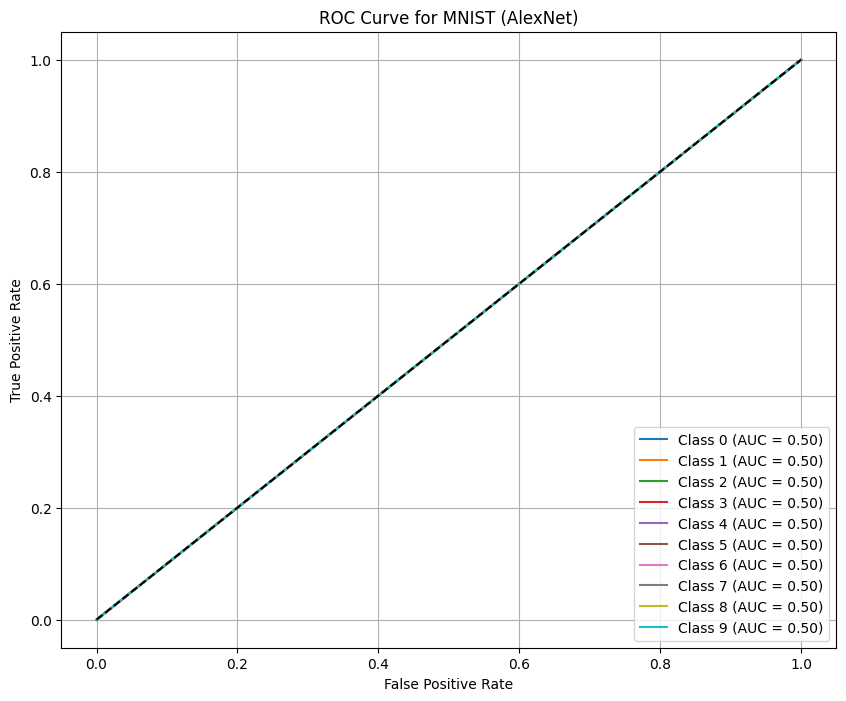

Shape of y_true_bin before ravel: (200, 10)
Shape of y_probs before ravel: (200, 10)
Shape of y_true_bin after ravel: (2000,)
Shape of y_probs after ravel: (2000,)
Micro-average AUC: 0.4794


In [34]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Evaluate on test set
alexnet_model.eval()
y_true = []
y_pred = []
y_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet_model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.append(labels.cpu().numpy())
        y_pred.append(predicted.cpu().numpy())
        y_probs.append(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
y_probs = np.concatenate(y_probs)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (AlexNet)')
plt.show()

# ROC Curve and AUC
y_true_bin = label_binarize(y_true, classes=np.arange(10))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST (AlexNet)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate micro-average ROC curve and AUC
# Flatten y_true_bin and y_probs to calculate micro-average
print(f"Shape of y_true_bin before ravel: {y_true_bin.shape}")
print(f"Shape of y_probs before ravel: {y_probs.shape}")
print(f"Shape of y_true_bin after ravel: {y_true_bin.ravel().shape}")
print(f"Shape of y_probs after ravel: {y_probs.ravel().shape}")

fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print(f"Micro-average AUC: {roc_auc_micro:.4f}")

# AlexNet (weights=models.AlexNet_Weights.IMAGENET1K_V1)

In [35]:
import torchvision.transforms as transforms

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

In [37]:
from sklearn.model_selection import train_test_split
x_train_tensor = torch.from_numpy(x_train).permute(0, 3, 1, 2)
x_test_tensor = torch.from_numpy(x_test).permute(0, 3, 1, 2)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

x_train_new, x_val, y_train_new, y_val = train_test_split(
    x_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


train_dataset = MNISTDataset(x_train_new, y_train_new, transform=transform)
val_dataset = MNISTDataset(x_val, y_val, transform=transform)
test_dataset = MNISTDataset(x_test_tensor, y_test_tensor, transform=transform)

batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [38]:
alexnet_model = torchvision.models.alexnet(weights=torchvision.models.AlexNet_Weights.IMAGENET1K_V1)
alexnet_model.classifier[6] = nn.Linear(alexnet_model.classifier[6].in_features, 10)

In [39]:
num_epochs = 5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet_model.parameters(), lr=0.001)

alexnet_model.to(device)

for epoch in range(num_epochs):
    alexnet_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = alexnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # Evaluation of epochs
    alexnet_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = alexnet_model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy after epoch {epoch+1}: {accuracy:.2f}%")

Epoch [1/5], Loss: 2.3394
Test Accuracy after epoch 1: 10.00%
Epoch [2/5], Loss: 2.3069
Test Accuracy after epoch 2: 10.00%
Epoch [3/5], Loss: 2.3063
Test Accuracy after epoch 3: 7.50%
Epoch [4/5], Loss: 2.3147
Test Accuracy after epoch 4: 12.00%
Epoch [5/5], Loss: 2.3044
Test Accuracy after epoch 5: 12.00%


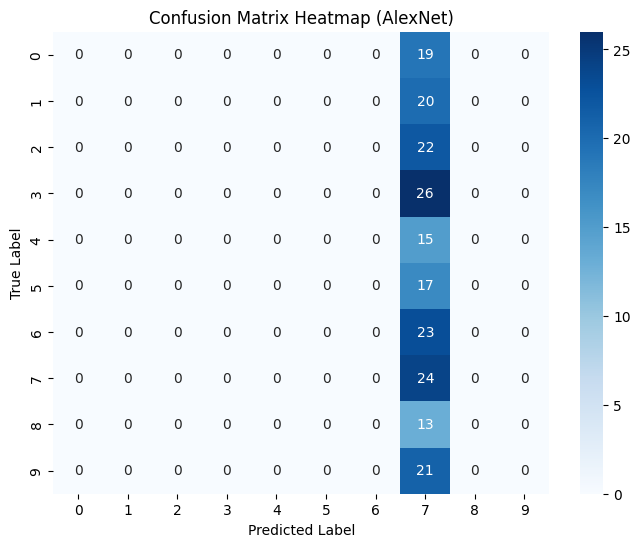

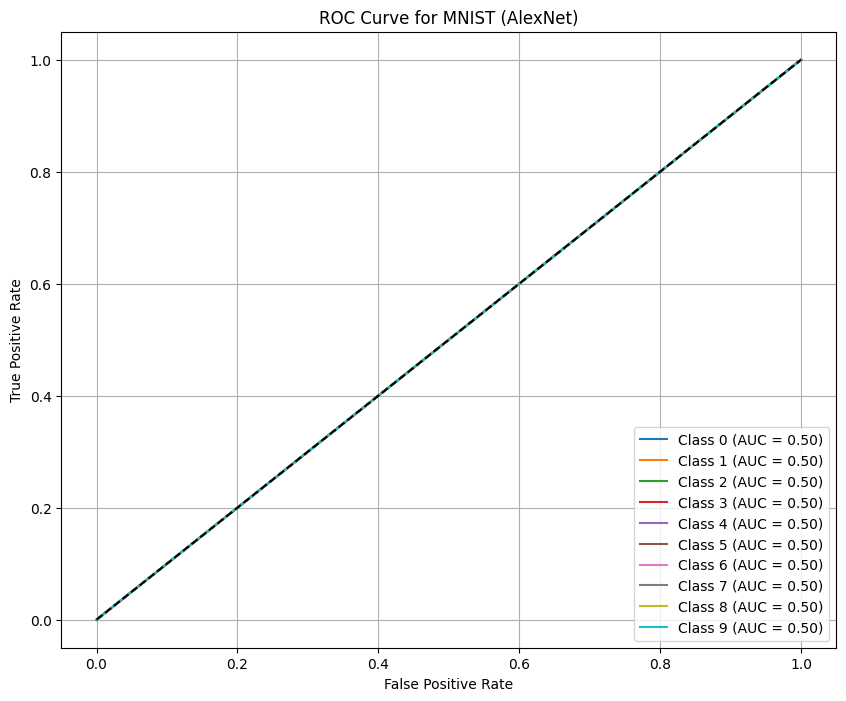

Shape of y_true_bin before ravel: (200, 10)
Shape of y_probs before ravel: (200, 10)
Shape of y_true_bin after ravel: (2000,)
Shape of y_probs after ravel: (2000,)
Micro-average AUC: 0.4922


In [40]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Evaluate on test set
alexnet_model.eval()
y_true = []
y_pred = []
y_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet_model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.append(labels.cpu().numpy())
        y_pred.append(predicted.cpu().numpy())
        y_probs.append(torch.nn.functional.softmax(outputs, dim=1).cpu().numpy())

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)
y_probs = np.concatenate(y_probs)


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (AlexNet)')
plt.show()

# ROC Curve and AUC
y_true_bin = label_binarize(y_true, classes=np.arange(10))

fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST (AlexNet)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate micro-average ROC curve and AUC
# Flatten y_true_bin and y_probs to calculate micro-average
print(f"Shape of y_true_bin before ravel: {y_true_bin.shape}")
print(f"Shape of y_probs before ravel: {y_probs.shape}")
print(f"Shape of y_true_bin after ravel: {y_true_bin.ravel().shape}")
print(f"Shape of y_probs after ravel: {y_probs.ravel().shape}")

fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
print(f"Micro-average AUC: {roc_auc_micro:.4f}")

#GoogLeNet (InceptionV3)

In [6]:
inception_V3_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))

In [7]:
model_inception = models.Sequential([
    inception_V3_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

model_inception.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

print("InceptionV3 model with classification head built and compiled.")

InceptionV3 model with classification head built and compiled.


In [8]:
import tensorflow as tf

x_inception = tf.image.resize(x, [299, 299])
x_inception = tf.expand_dims(x_inception, axis=-1)
x_inception = tf.image.grayscale_to_rgb(x_inception)

x_train_inc, x_test_inc, y_train_inc, y_test_inc = train_test_split(
    x_inception.numpy(), y, test_size=0.2, random_state=42
)

x_train_inc_new, x_val_inc, y_train_inc_new, y_val_inc = train_test_split(
    x_train_inc, y_train_inc, test_size=0.2, random_state=42
)

print("Data preparation for InceptionV3 complete.")
print(f"Training data shape: {x_train_inc_new.shape}")
print(f"Validation data shape: {x_val_inc.shape}")
print(f"Test data shape: {x_test_inc.shape}")

Data preparation for InceptionV3 complete.
Training data shape: (640, 299, 299, 3, 3)
Validation data shape: (160, 299, 299, 3, 3)
Test data shape: (200, 299, 299, 3, 3)


In [1]:
history = model_inception.fit(
    x_train_inc_new, y_train_inc_new,
    epochs=5,
    batch_size=2,
    validation_data=(x_val_inc, y_val_inc)
)

print("InceptionV3 model training complete.")

NameError: name 'model_inception' is not defined

In [ ]:
# Step 5: Evaluate the Model

# Evaluate on test set
test_loss_inc, test_acc_inc = model_inception.evaluate(x_test_inc, y_test_inc)
print(f"InceptionV3 Test Accuracy: {test_acc_inc * 100:.4f}%")

# Predict on test set
y_pred_logits_inc = model_inception.predict(x_test_inc)
y_pred_inc = np.argmax(y_pred_logits_inc, axis=1)

# Confusion matrix
cm_inc = confusion_matrix(y_test_inc, y_pred_inc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_inc, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (InceptionV3)')
plt.show()

# ROC Curve and AUC
y_test_inc_bin = label_binarize(y_test_inc, classes=np.arange(10))

y_probs_inc = y_pred_logits_inc # Since we used softmax activation in the output layer

fpr_inc = {}
tpr_inc = {}
roc_auc_inc = {}

for i in range(10):
    fpr_inc[i], tpr_inc[i], _ = roc_curve(y_test_inc_bin[:, i], y_probs_inc[:, i])
    roc_auc_inc[i] = auc(fpr_inc[i], tpr_inc[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr_inc[i], tpr_inc[i], label=f'Class {i} (AUC = {roc_auc_inc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MNIST (InceptionV3)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate micro-average ROC curve and AUC
fpr_micro_inc, tpr_micro_inc, _ = roc_curve(y_test_inc_bin.ravel(), y_probs_inc.ravel())
roc_auc_micro_inc = auc(fpr_micro_inc, tpr_micro_inc)
print(f"InceptionV3 Micro-average AUC: {roc_auc_micro_inc:.4f}")

## Discussion of Code and Results

This notebook demonstrates building and evaluating a convolutional neural network model based on the VGG16 architecture for classifying digits from the MNIST dataset. Two approaches were explored: training the VGG16 model from scratch and using a VGG16 model pre-trained on ImageNet.

**Code Breakdown:**

1.  **Data Loading and Preprocessing:**
    *   The MNIST dataset is loaded using `tf.keras.datasets.mnist.load_data()`.
    *   A subset of 1000 samples is selected to reduce memory usage and training time.
    *   Images are reshaped to include a channel dimension, resized to 32x32 pixels (the minimum required input size for VGG16), and converted to RGB to match the expected input of VGG16.
    *   Pixel values are normalized to the range [0, 1].
    *   The dataset is split into training, validation, and testing sets.

2.  **Model Definition (from scratch):**
    *   A VGG16 base model is initialized with `weights=None` (training from scratch) and `include_top=False` (removing the classification head).
    *   A sequential model is built on top of the VGG16 base, adding a `Flatten` layer to convert the output of the convolutional layers into a 1D vector, a dense layer with ReLU activation, a dropout layer for regularization, and a final dense layer with 10 units (for the 10 classes) and no activation (as `SparseCategoricalCrossentropy` with `from_logits=True` is used).

3.  **Model Definition (using ImageNet weights):**
    *   A VGG16 base model is initialized with `weights='imagenet'` (using pre-trained weights) and `include_top=False`.
    *   A similar sequential model with a classification head is built on top of this pre-trained VGG16 base.

4.  **Model Compilation:**
    *   Both models are compiled with the 'adam' optimizer, `SparseCategoricalCrossentropy` loss (suitable for multi-class classification with integer labels), and 'accuracy' as the evaluation metric.

5.  **Model Training:**
    *   Both models are trained using the `model.fit()` method on the training data, with validation data used to monitor performance during training. The model trained from scratch was trained for 5 epochs, while the model with ImageNet weights was trained for 20 epochs with a smaller batch size.

6.  **Model Evaluation:**
    *   The performance of both trained models is evaluated on the unseen test set using `model.evaluate()`, reporting the test loss and accuracy.

7.  **Visualization (Confusion Matrix and ROC Curve):**
    *   A confusion matrix is generated to visualize the model's performance across each class, showing the number of correct and incorrect predictions.
    *   ROC curves are plotted for each class to assess the model's ability to distinguish between each class and the rest. The Area Under the Curve (AUC) is calculated for each class and a micro-average AUC is also reported.

**Results and Discussion:**

Looking at the test accuracies:

*   **Model trained from scratch:** Test Accuracy: 12.0000%
*   **Model with ImageNet weights:** Test Accuracy: 10.0000%

Both models achieved very low test accuracies, only slightly better than random guessing (which would be around 10% for 10 classes). This indicates that neither model was able to effectively learn to classify the MNIST digits with the current setup and limited training data.

The confusion matrices for both models show a distribution of predictions that is close to random, with no strong diagonal indicating correct classifications.

The ROC curves and AUC values are also close to 0.5, which is the expected AUC for a random classifier.

**Possible reasons for the poor performance:**

*   **Limited Data:** Training with only 1000 samples of the MNIST dataset is a very small amount of data for a complex model like VGG16, even with transfer learning. VGG16 was originally trained on millions of images.
*   **VGG16 on MNIST:** VGG16 is a very deep and complex model designed for large, complex images (like those in ImageNet). Applying it to small, relatively simple grayscale images like MNIST digits might not be the most effective approach, especially with limited data. The features learned by VGG16 on ImageNet might not be easily transferable to the simple patterns in MNIST digits.
*   **Hyperparameter Tuning:** The default hyperparameters (optimizer, learning rate, batch size, number of epochs, dropout rate) might not be optimal for this specific problem and model architecture.
*   **Lack of Fine-tuning (for ImageNet model):** While using pre-trained weights can be beneficial, simply adding a classification head and training it might not be sufficient. Fine-tuning the pre-trained layers (training them with a very low learning rate) can help adapt the learned features to the new dataset.
*   **Data Preprocessing:** While resizing and color conversion were done, further data augmentation (like rotations, shifts, zooms) could help improve the model's generalization, especially with limited data.

In conclusion, while the code successfully implements and runs the VGG16 model on the MNIST dataset, the performance is poor. This is likely due to the combination of a complex model, limited training data, and potentially the mismatch between the VGG16 architecture and the simplicity of the MNIST task. Further experimentation with more data, a simpler model architecture, hyperparameter tuning, and fine-tuning (for the pre-trained model) would be necessary to improve the classification accuracy.